In [13]:
import numpy as np  # For numerical operations
import cv2  # OpenCV for image processing
import os  # For handling file paths
from sklearn.model_selection import train_test_split  # To split the dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Model evaluation
from sklearn.decomposition import PCA  # Dimensionality reduction
from sklearn.preprocessing import LabelEncoder  # Encode emotion labels
from sklearn import svm  # Support Vector Machine
import matplotlib.pyplot as plt

In [14]:
# Function to load and preprocess images from the dataset
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for emotion_label in os.listdir(folder_path):
        emotion_folder = os.path.join(folder_path, emotion_label)
        if os.path.isdir(emotion_folder):
            for img_file in os.listdir(emotion_folder):
                img_path = os.path.join(emotion_folder, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img_resized = cv2.resize(img, (48, 48))
                    images.append(img_resized.flatten())
                    labels.append(emotion_label)
    return images, labels

In [15]:
# Path to CK+48 dataset
dataset_folder = r"D:\Reserach\svm3\CK+48"

In [16]:
# Load the full dataset
X, y = load_images_from_folder(dataset_folder)

# Convert to numpy arrays and normalize
X = np.array(X) / 255.0
y = np.array(y)

In [17]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
# Encode emotion labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [19]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data based on the scaler fitted on the training data
X_test = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import  RidgeClassifier
rdc  =  RidgeClassifier()
rdc.fit(X_train, y_train_encoded)
y_pred = rdc.predict(X_test)

In [21]:
sc=rdc.score(X_train,y_train_encoded)

In [22]:
accuracy = accuracy_score(y_test_encoded,y_pred)

In [23]:
# Evaluate the model
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Training Score: {sc * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

Test Accuracy: 98.48%
Training Score: 100.00%

Classification Report:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        27
    contempt       1.00      1.00      1.00        11
     disgust       1.00      0.91      0.96        35
        fear       0.94      1.00      0.97        15
       happy       0.98      1.00      0.99        42
     sadness       1.00      1.00      1.00        17
    surprise       0.98      1.00      0.99        50

    accuracy                           0.98       197
   macro avg       0.98      0.99      0.99       197
weighted avg       0.99      0.98      0.98       197


Confusion Matrix:
[[27  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0 32  1  1  0  1]
 [ 0  0  0 15  0  0  0]
 [ 0  0  0  0 42  0  0]
 [ 0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0 50]]


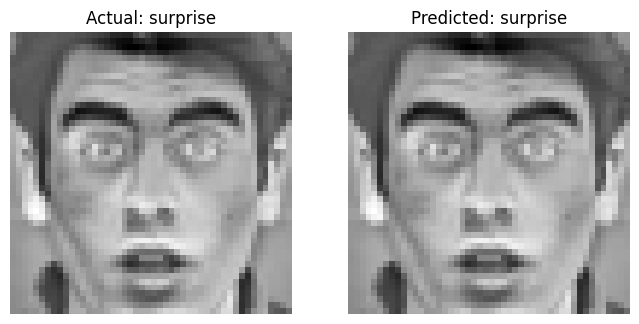

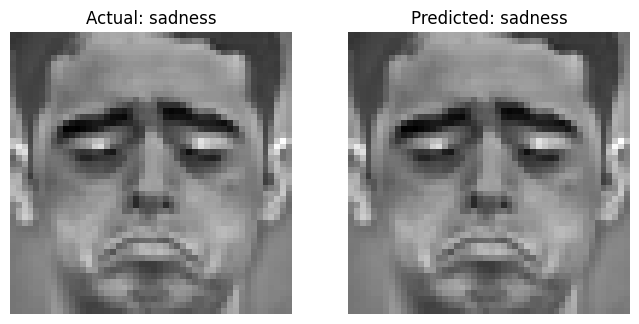

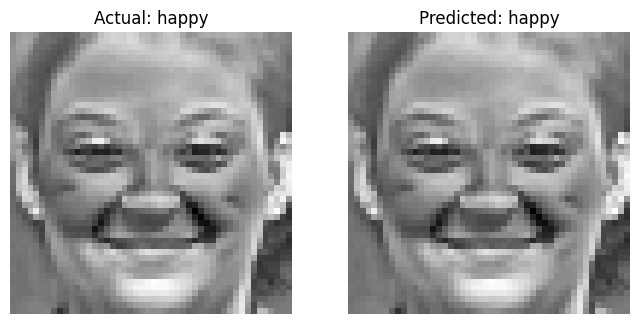

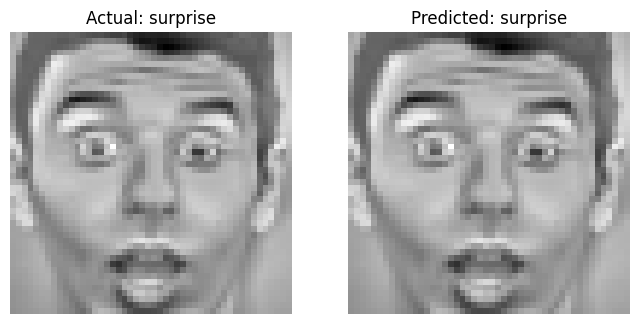

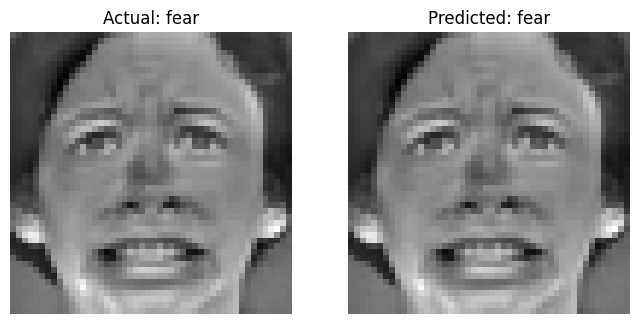

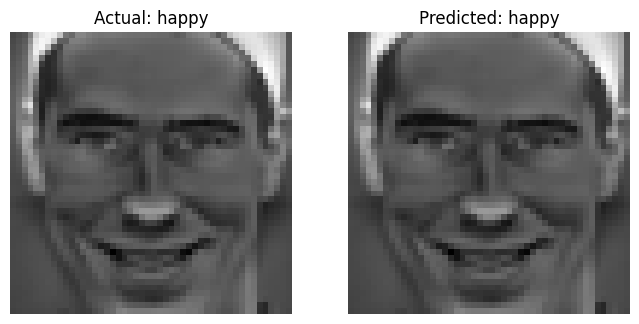

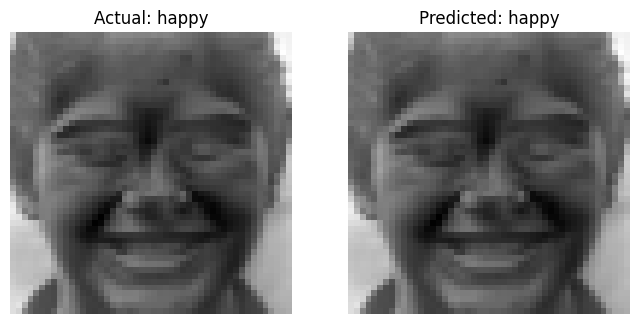

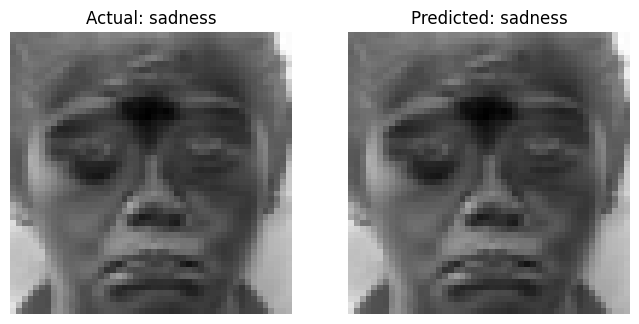

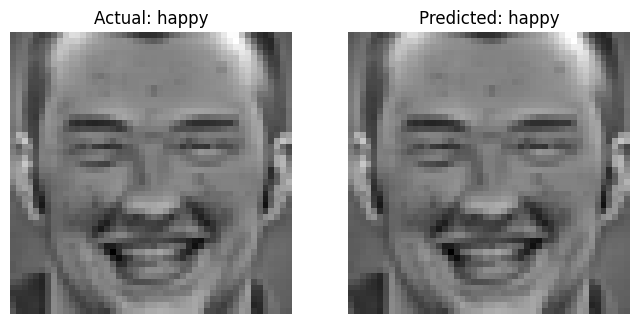

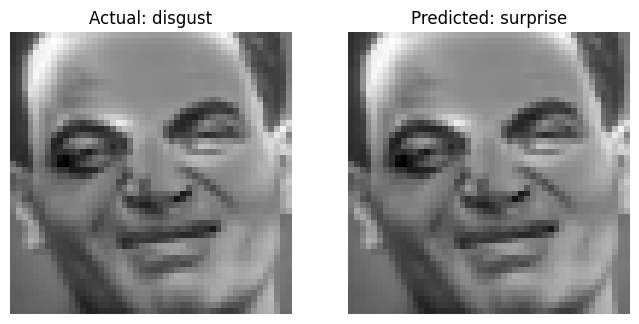

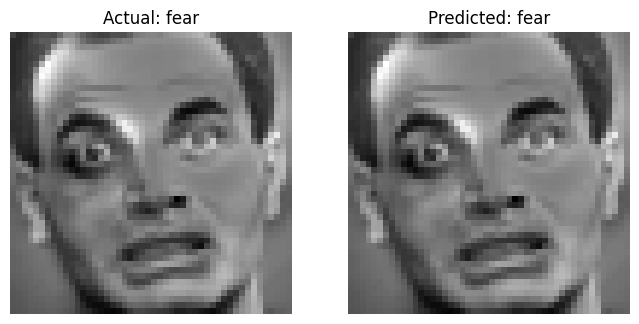

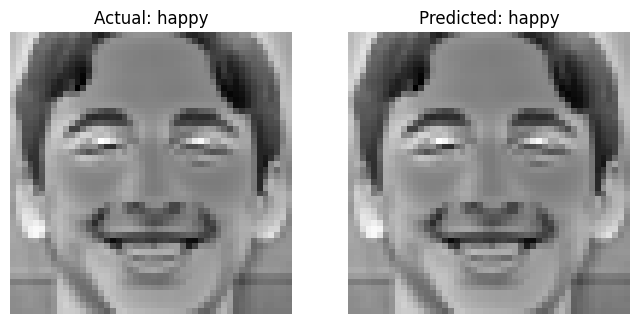

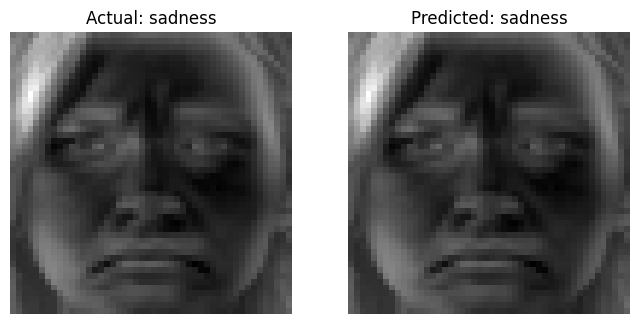

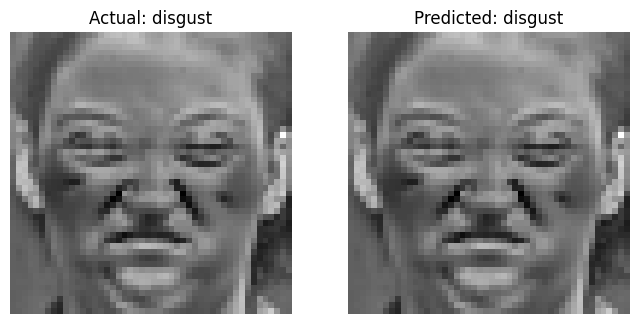

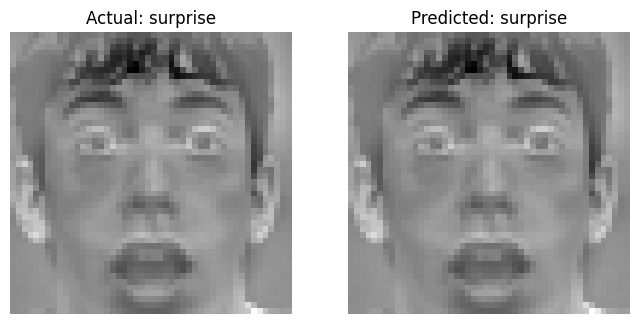

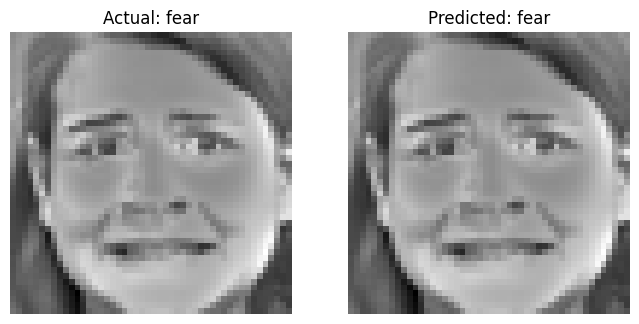

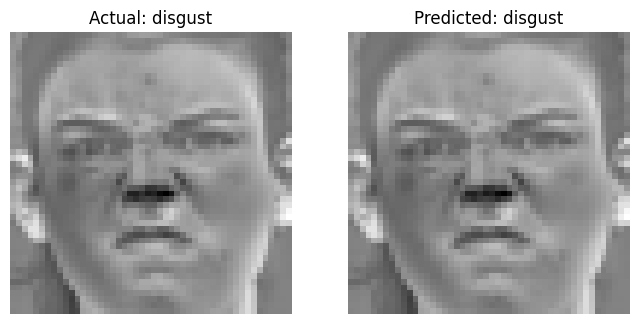

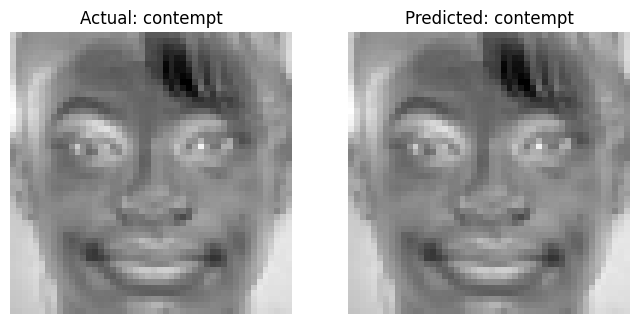

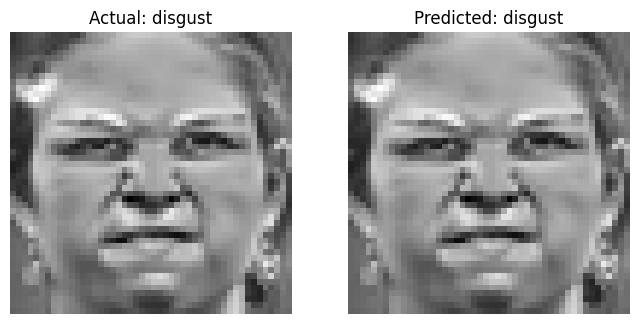

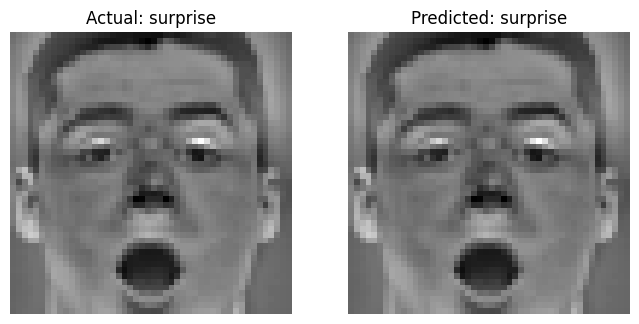

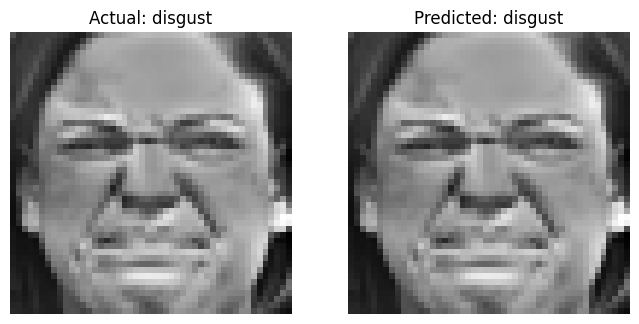

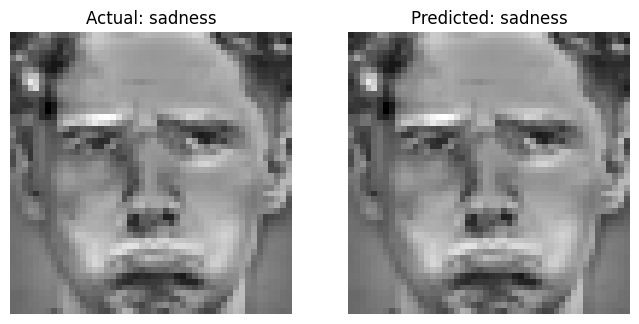

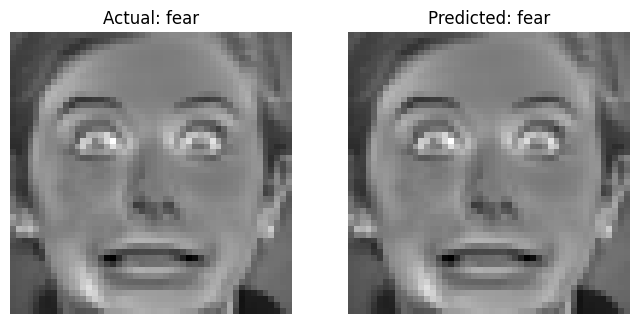

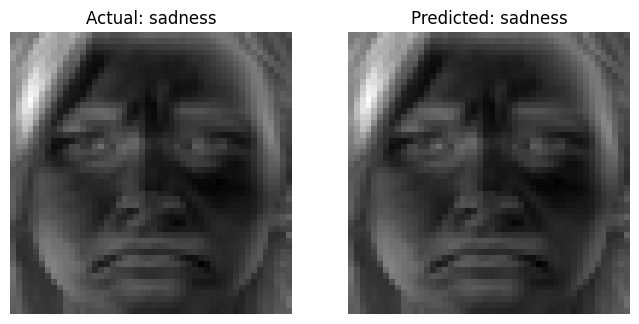

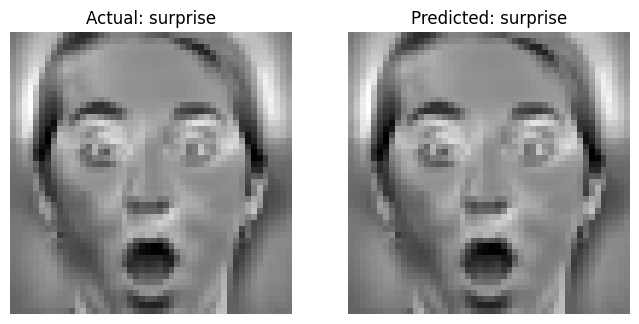

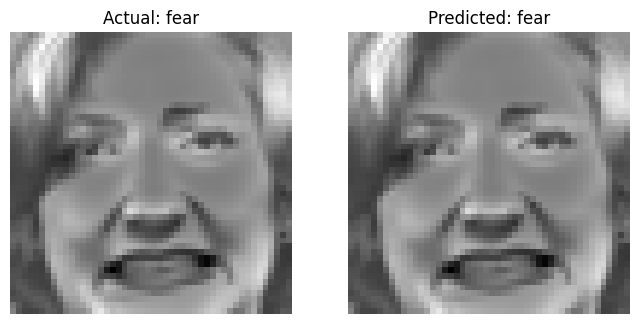

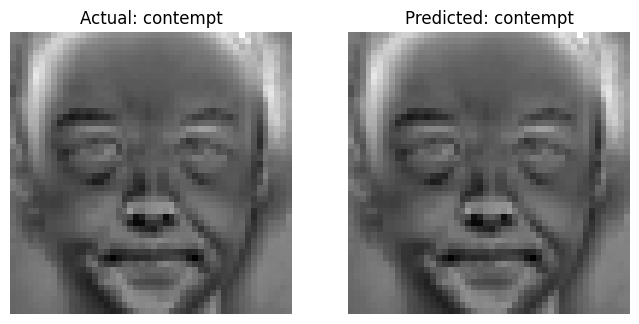

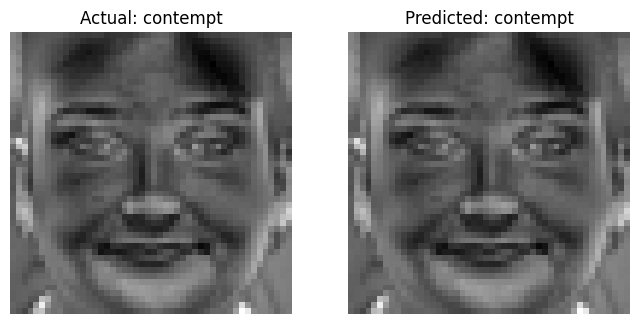

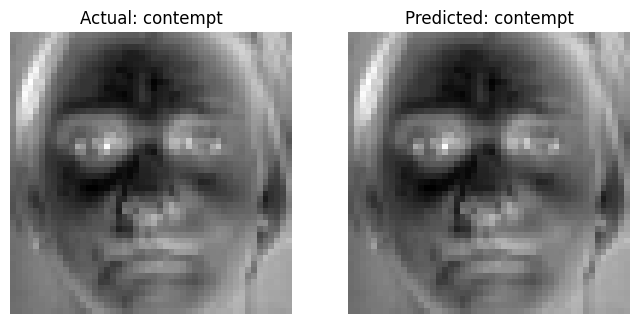

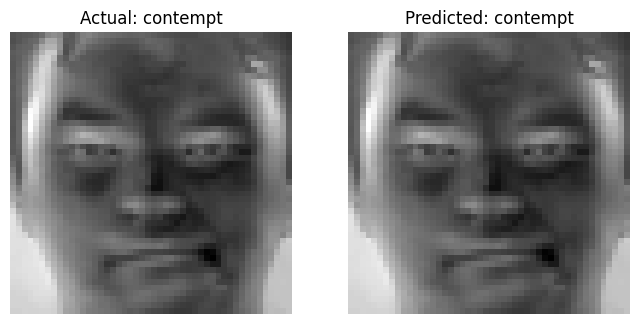

In [24]:
# Visualize test images with actual and predicted labels
emotions_to_display = ['angry', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
displayed_emotions = {emotion: 0 for emotion in emotions_to_display}  # Track displayed images
num_per_emotion = 5  # Number of images to display per emotion

for i in range(len(X_test)):
    true_label = label_encoder.inverse_transform([y_test_encoded[i]])[0]
    pred_label = label_encoder.inverse_transform([y_pred[i]])[0]

    # Check if we need to display this emotion
    if true_label in emotions_to_display and displayed_emotions[true_label] < num_per_emotion:
        plt.figure(figsize=(8, 4))

        # Actual image
        plt.subplot(1, 2, 1)
        plt.imshow(X_test[i].reshape(48, 48), cmap='gray')
        plt.title(f"Actual: {true_label}")
        plt.axis('off')

        # Predicted image
        plt.subplot(1, 2, 2)
        plt.imshow(X_test[i].reshape(48, 48), cmap='gray')
        plt.title(f"Predicted: {pred_label}")
        plt.axis('off')

        plt.show()

        # Increment displayed emotion count
        displayed_emotions[true_label] += 1

    # Stop once all emotions have been displayed
    if all(count >= num_per_emotion for count in displayed_emotions.values()):
        break